<a href="https://colab.research.google.com/github/Rakesh6733/stock-prediction-using-LSTM/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pd.options.display.max_rows = 1000
dataset_train = pd.read_csv("/content/drive/MyDrive/Manipal/Google_Stock_Price_Train.csv")
data = pd.DataFrame(dataset_train)
print(data)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]


In [ ]:
training_set = dataset_train.iloc[:,1:2].values


# Normalizing the dataset
# fit_transform is used in training the data whereas transform is used in testing the data
# fit_transform function is the combination of fit and transform functions
# fit method measures the mean and variance of the features
# transform method use the mean and variance to transform the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
print(scaled_training_set)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [ ]:

x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(scaled_training_set[i-60:i,0]) # starts from 1 and ends at 1198 which means total rows 1198 and each row contains 60 elements
    y_train.append(scaled_training_set[i, 0]) # starts from 60 and ends at 1258 which means total rows 1198

x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train)
print("------------")
print(y_train)


[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
------------
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [ ]:
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
print(x_train)
print(x_train.shape)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
(1198, 60, 1)


In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [ ]:
# Creating the model
model = keras.Sequential()


model.add(layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2)) # Implementing the dropout layer to the LSTM layer

model.add(layers.LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2)) # Implementing the dropout layer to the LSTM layer

model.add(layers.LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2)) # Implementing the dropout layer to the LSTM layer

model.add(LSTM(units = 50))
model.add(Dropout(0.2)) # Implementing the dropout layer to the LSTM layer

model.add(Dense(units = 1)) # Adding the Dense layer
# Here we are adding the dense layer to previous layers to get single output value

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
# Fitting the Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error') # Used Mean square error for performance measure of regression model
model.fit(x_train, y_train, epochs=100, batch_size=32) # Training the model with model.fit() method


Epoch 1/100
24/24 [==============================] - 11s 22ms/step - loss: 0.0639
Epoch 2/100
24/24 [==============================] - 1s 21ms/step - loss: 0.0098
Epoch 3/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0059
Epoch 4/100
24/24 [==============================] - 0s 21ms/step - loss: 0.0055
Epoch 5/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0051
Epoch 6/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0049
Epoch 7/100
24/24 [==============================] - 1s 22ms/step - loss: 0.0049
Epoch 8/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0050
Epoch 9/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0045
Epoch 10/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0048
Epoch 11/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0047
Epoch 12/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0042
Epoch 13/100
24/24 [====

In [ ]:
dataset_test = pd.read_csv("/content/drive/MyDrive/Manipal/Google_Stock_Price_Test.csv")
actual_stock_price = dataset_test.iloc[:, 1:2].values
data_test = pd.DataFrame(actual_stock_price)
print(data_test)

         0
0   778.81
1   788.36
2   786.08
3   795.26
4   806.40
5   807.86
6   805.00
7   807.14
8   807.48
9   807.08
10  805.81
11  805.12
12  806.91
13  807.25
14  822.30
15  829.62
16  837.81
17  834.71
18  814.66
19  796.86


In [ ]:

# concatinating the Open column from train and Open column from testing and representing in the axis = 0
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) # 1258 + 20 = 1278
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values # 1278 - 20 - 60 = 1198
print(inputs)
print("-------")
print(dataset_total.shape)
print(inputs.shape)



[779.   779.66 777.71 786.66 783.76 781.22 781.65 779.8  787.85 798.24
 803.3  795.   804.9  816.68 806.34 801.   808.35 795.47 782.89 778.2
 767.25 750.66 774.5  783.4  779.94 791.17 756.54 755.6  746.97 755.2
 766.92 771.37 762.61 772.63 767.73 764.26 760.   771.53 770.07 757.44
 744.59 757.71 764.73 761.   772.48 780.   785.04 793.9  797.4  797.34
 800.4  790.22 796.76 795.84 792.36 790.9  790.68 793.7  783.33 782.75
 778.81 788.36 786.08 795.26 806.4  807.86 805.   807.14 807.48 807.08
 805.81 805.12 806.91 807.25 822.3  829.62 837.81 834.71 814.66 796.86]
-------
(1278,)
(80,)


In [ ]:

inputs = inputs.reshape(-1, 1) # Here -1 means that we let the numpy to figure it 
inputs = scaler.transform(inputs)
print(inputs.shape)
print(inputs)

(80, 1)
[[0.9299055 ]
 [0.93113327]
 [0.92750577]
 [0.94415507]
 [0.93876032]
 [0.93403527]
 [0.93483518]
 [0.9313937 ]
 [0.94636878]
 [0.96569685]
 [0.97510976]
 [0.95966962]
 [0.97808617]
 [1.        ]
 [0.98076494]
 [0.97083116]
 [0.98450406]
 [0.96054394]
 [0.9371419 ]
 [0.92841729]
 [0.90804747]
 [0.8771858 ]
 [0.92153434]
 [0.93809063]
 [0.93165414]
 [0.95254483]
 [0.88812412]
 [0.88637547]
 [0.87032145]
 [0.88563137]
 [0.90743359]
 [0.91571173]
 [0.89941588]
 [0.91805566]
 [0.9089404 ]
 [0.9024853 ]
 [0.89456061]
 [0.91600938]
 [0.9132934 ]
 [0.88979835]
 [0.86589404]
 [0.89030062]
 [0.90335962]
 [0.89642086]
 [0.91777662]
 [0.93176576]
 [0.94114145]
 [0.95762334]
 [0.96413424]
 [0.96402262]
 [0.96971501]
 [0.95077759]
 [0.96294367]
 [0.96123223]
 [0.95475854]
 [0.95204256]
 [0.95163331]
 [0.95725128]
 [0.93796041]
 [0.93688146]
 [0.92955205]
 [0.94731751]
 [0.94307612]
 [0.96015329]
 [0.98087655]
 [0.98359253]
 [0.97827219]
 [0.98225314]
 [0.98288563]
 [0.98214153]
 [0.979779  

In [ ]:

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

(20, 60)


In [ ]:

predicted_stock_price = model.predict(X_test) # model is created and fitted with trained data and used for making predictions
predicted_stock_price = scaler.inverse_transform(predicted_stock_price) # It undo the scaling which means it converts again into stock prices
print(predicted_stock_price)



1/1 [==============================] - 1s 1s/step
[[773.487  ]
 [770.8514 ]
 [771.4706 ]
 [772.5438 ]
 [775.52496]
 [780.9278 ]
 [785.3293 ]
 [786.58966]
 [786.776  ]
 [786.7834 ]
 [786.8645 ]
 [786.8786 ]
 [786.9593 ]
 [787.7683 ]
 [788.82764]
 [793.75256]
 [800.2279 ]
 [806.76263]
 [809.585  ]
 [804.4981 ]]


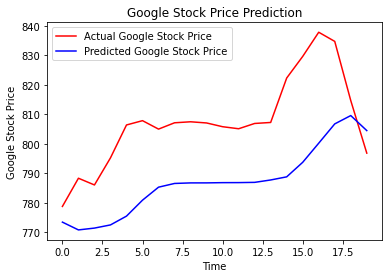

In [ ]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend() 